# Basic R


    
<img src="https://www.r-project.org/logo/Rlogo.png" width="100">


Zhentao Shi

## Statistical Languages

* Time investment is essential for language learning
* Python vs R

* Official document: [R-Introduction](https://cran.r-project.org/doc/manuals/r-release/R-intro.pdf)

## Installation

Locally, R works on Windows, MacOS, and Linux. 

* [R project](https://cran.r-project.org/mirrors.html)

**Local interfaces**

* `rgui`

* [RStudio](https://www.rstudio.com/products/rstudio/download/)

* Command line interface (cli)

**Remote interfaces**

CUHK Econ's [SCRP](https://scrp-login-2.econ.cuhk.edu.hk/) provides 
* RStudio
* JupyterHub 

[Gitpod](https://gitpod.io/#https://github.com/zhentaoshi/econ_data_science) is cloud IDE.


## Help System

* If exact name of a function known, call `help(function_name)` or `?function_name`
* Otherwise, `??key_words`

In [ ]:
?seq

In [ ]:
??sequence

## Assignment

 * `<-` or `=`
   * Personally I prefer "=" to "<-".

In [ ]:
a <- 1; a

In [ ]:
b <- 2; b

In [ ]:
f = a + b; f # try to avoid `c`, which is an internal command

In [ ]:
d = log(f); d

In [ ]:
e = sqrt(d); e

In [ ]:
cat("log(c) =", e, "is a simple calculation"); print(e)

In [ ]:
cat("exp(e) =", exp(e), ". I want a nice new line. \n"); print(e)

In [ ]:
ls() # display the objects in memory

R is case sentitive. `a` and `A` are two different objects.

In [ ]:
A = "abc"
cat("a is", a, ", whereas A is ", A, ".")

Clean up the memory. It is recommended as the first line of a clean script.

In [ ]:
rm(list = ls())

In [ ]:
ls()

## Vector

* A collection of elements of the same type
  * integer
  * logical
  * real number
  * complex number 
  * characters
  * factor

  
* R does not require explicit type declaration.

 * `c()`  combines two or more vectors into a long vector.
 * Binary arithmetic operations
   * element by element 
   * `+`, `-`, `*` and `/`
   * logical operations `&` `|` `!=`

In [ ]:
a = c(1,2,3, 4); a

In [ ]:
b = rep(c(1,2), 2); b

In [ ]:
a+b

In [ ]:
# logical vectors
logi_1 <- c(T, T, F); logi_1

In [ ]:
logi_2 <- c(F, T, T); logi_2

In [ ]:
logi_1 & logi_2

Missing values in R is represented as `NA` (Not Available). 

In [ ]:
   a = NA; b = 3; a+b

When some operations are not allowed, say, `log(-1)`, R returns  `NaN` (Not a Number).

In [ ]:
log(-1)

In [ ]:
sqrt(-1)

In [ ]:
a = Inf
a+a

In [ ]:
b = -Inf
a+b

## Selection

* Vector selection is specified in square bracket `a[ ]` 
  * by either positive integer or logical vector.
  * Index initiates from 1, not 0 (Python's rule). 

In [ ]:
a = 1:10
a[5:7]

In [ ]:
d = seq(-1, 1, by = 0.1); print(d)
d[5:7]

In [ ]:
f = c("a","b","c","d","e","f","g","h","i","j")
f[5:7]

In [ ]:
b = "abcdefghij"
b[5:7] # the indexed items do not exists

## Data types


In [ ]:
a <- "18"; a

In [ ]:
b <- as.numeric(a); b

In [ ]:
x = pi * c(-1:1, 10); x

In [ ]:
as.integer(x)

In [ ]:
a = 3; is.integer(a) # it is numeric

In [ ]:
a = as.integer(3); a; is.integer(a)

In [ ]:
b = as.double(a); is.integer(b); b

## Array and Matrix

* *array*: number table of multiple dimensions. 
* *matrix*: 2-dimensional array.

* R is of column-major order
* array arithmetic: element-by-element. 

In [ ]:
A = array(rpois(4*3*2, lambda = 1), dim = c(4,3,2)); print(A) # 3 dimensional array

In [ ]:
B = array(rnorm(4*3*2), dim = c(4,3,2)); print(B)

In [ ]:
print(A+B)

Caution must be exercised in binary operations involving two objects of different length. This is error-prone.

In [ ]:
A = matrix(1:6, 3); print(A)

In [ ]:
B = matrix(1:3, 3); print(B)

In [ ]:
print(A+B) # produce error message

In [ ]:
b = 1:3
print(A+b)

In [ ]:
d = 1:4
print(A+d)

## Matrix Operations

* `%*%`: matrix multiplication
* `solve` matrix inverse
* `eigen` eigenvalues and eigenvectors

**Example**: OLS estimation with one $x$ regressor and a constant.
Graduate textbook expresses the OLS in matrix form
$$\hat{\beta} = (X' X)^{-1} X'y.$$
To conduct OLS estimation in R, we literally translate the mathematical expression into code.



Step 1: We need data $Y$ and $X$ to run OLS. We simulate an artificial dataset.

In [ ]:
# simulate data
rm(list = ls())
set.seed(111) # can be removed to allow the result to change

# set the parameters
n <- 100
b0 <- matrix(c(0.2, 1.0), nrow = 2)

# generate the data
e <- rnorm(n)
X <- cbind(1, rnorm(n))
Y <- X %*% b0 + e
rm(e)

Step 2: translate the formula to code


In [ ]:
# OLS estimation
bhat <- solve(t(X) %*% X, t(X) %*% Y); print(bhat)

In [ ]:
bhat <- solve( crossprod(X), crossprod(X, Y))
print( bhat ) # equivalent computation

Step 3 (additional): plot the regression graph with the scatter points and the regression line.

* Further compare the regression line (black) with the true coefficient line (red).


In [ ]:
# plot
plot(y = Y, x = X[, 2], xlab = "X", ylab = "Y", main = "regression")
abline(a = bhat[1], b = bhat[2])
abline(a = b0[1], b = b0[2], col = "red")
abline(h = 0, lty = 2)
abline(v = 0, lty = 2)

Step 4: Hypothesis testing.

The *t*-statistic is widely used.
To test the null $H_0: \beta_2 = 1$, we compute the associated *t*-statistic.
Again, this is a translation.
$$
t  =  \frac{\hat{\beta}_2 - \beta_{02}}{ \hat{\sigma}_{\hat{\beta}_2}  }
   =  \frac{\hat{\beta}_2 - \beta_{02}}{ \sqrt{ \left[ (X'X)^{-1} \hat{\sigma}^2 \right]_{22} } }.
$$
where $[\cdot]_{22}$ is the (2,2)-element of a matrix.


In [ ]:
# calculate the t-value
bhat2 <- bhat[2] # the parameter we want to test
e_hat <- Y - X %*% bhat
sigma_hat_square <- sum(e_hat^2) / (n - 2)
Sigma_B <- solve(t(X) %*% X) * sigma_hat_square
t_value_2 <- (bhat2 - b0[2]) / sqrt(Sigma_B[2, 2])
cat("The t-statistic =", t_value_2)

## Mixed Data Types

*  *Vector* only contains one type of elements.
* *list* is a basket for objects of various types.
  * A container when a procedure returns more than one useful object.

In [ ]:
Lst <- list(dept = "Econ", no = 5821)
Lst

In [ ]:
Lst$dept

In [ ]:
Lst[[2]]

**Example**: When we invoke `eigen`, we are
interested in both eigenvalues and eigenvectors,
which are stored into `$value` and `$vector`, respectively.

In [ ]:
A = diag(2)
eigen(A)

## Package

* Base installation is small
* Extensive ecosystem of add-on packages.
* Most packages are hosted on [CRAN](https://cran.r-project.org/web/packages/).
 

* Installation: `install.packages("package_name")`. 

* Invoking: `library(package_name)` or `package_name::function_name`

In [1]:
library(magrittr)

## Input and Output

* Raw data is often saved in ASCII file or Excel.
* Excel spreadsheet is discouraged.
* Recommend `csv` format

`read.table()` or `read.csv()` imports data from an ASCII file into an R session.

**Example**: Acemoglu, Johnson and Robinson (2001). [Data source](https://economics.mit.edu/faculty/acemoglu/data/ajr2001). 
* This empirical example was adopted by Chang, Shi and Zhang (2023, JBES).

In [2]:
AJR = read.csv("data_example/AJR.csv", header = TRUE)
head(AJR)

,shortnam,logpgp95,loghjypl,avexpr,lat_abst,logem4,malfal94,yellow,leb95,imr95,meantemp,lt100km,euro1900,democ1,cons1,democ00a,cons00a
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,AGO,7.770645,-3.4112480,5.363636,0.1366667,5.634789,0.95000,1,46.49,125.0,22.94133,0.118758,8,0,3,0,1
2,ARG,9.133459,-0.8722738,6.386364,0.3777778,4.232656,0.00000,0,72.89,21.8,17.10000,0.123089,60,1,1,3,3
3,AUS,9.897972,-0.1707883,9.318182,0.3000000,2.145931,0.00000,1,78.25,5.6,20.90000,0.198958,98,10,7,10,7
4,BFA,6.845880,-3.5404590,4.454545,0.1444445,5.634789,0.95000,1,44.39,98.8,28.10000,0.000000,0,0,3,0,1
5,BGD,6.877296,-2.0635680,5.136364,0.2666667,4.268438,0.12008,1,58.13,78.8,25.68621,0.401598,0,8,7,0,1
6,BHS,9.285448,NA,7.500000,0.2683333,4.442651,NA,1,NA,NA,NA,NA,10,NA,NA,NA,NA


## Data Frame

* *data.frame* is a two-dimensional table that stores the data, 
  * similar to a spreadsheet in Excel.

* *Matrix* it only accommodates one type of elements.

* `tibble` is a new and refined alternative data frame type.

In [3]:
tibble::tibble(AJR)

shortnam,logpgp95,loghjypl,avexpr,lat_abst,logem4,malfal94,yellow,leb95,imr95,meantemp,lt100km,euro1900,democ1,cons1,democ00a,cons00a
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
AGO,7.770645,-3.4112480,5.363636,0.1366667,5.634789,0.95000,1,46.49,125.0,22.94133,0.118758,8,0,3,0,1
ARG,9.133459,-0.8722738,6.386364,0.3777778,4.232656,0.00000,0,72.89,21.8,17.10000,0.123089,60,1,1,3,3
AUS,9.897972,-0.1707883,9.318182,0.3000000,2.145931,0.00000,1,78.25,5.6,20.90000,0.198958,98,10,7,10,7
BFA,6.845880,-3.5404590,4.454545,0.1444445,5.634789,0.95000,1,44.39,98.8,28.10000,0.000000,0,0,3,0,1
BGD,6.877296,-2.0635680,5.136364,0.2666667,4.268438,0.12008,1,58.13,78.8,25.68621,0.401598,0,8,7,0,1
BHS,9.285448,NA,7.500000,0.2683333,4.442651,NA,1,NA,NA,NA,NA,10,NA,NA,NA,NA
BOL,7.926602,-1.9661130,5.636364,0.1888889,4.262680,0.00165,1,61.39,65.6,21.50000,0.000000,30,1,3,4,3
BRA,8.727454,-1.1425640,7.909091,0.1111111,4.262680,0.03600,1,66.78,42.4,23.70000,0.092516,40,1,1,1,3
CAN,9.986449,-0.0608122,9.727273,0.6666667,2.778819,0.00000,0,78.98,6.0,-0.20000,0.021164,99,7,7,9,7


<a id='AJR_exec'></a>
**Exercise**

Use the dataset `AJR.csv`. 
* Collect a small dataset with five columns `shortnam`, `logpgp95`, `avexpr` (protection against exploitation), `lat_abst`, `logem4` (log of mortality rate) and `cons1`.
* If any country has one of the above variables missing, remove that country from the data. (Hint: use `apply()`.)

* It is better to convert Chinese characters into the encoding `UTF-8`. 
  * Need experiment to deal with garbled texts.
  * `Notepad++` is a free tool for conversion; check `Encoding` in its menu.

In [4]:
# stock_id <- readr::read_csv("data_example/SH_stockid_UTF8.csv", 
# locale = readr::locale(encoding = "UTF-8"))

stock_id <- readr::read_csv("data_example/SH_stockid_UTF8.csv")
head(stock_id)

Rows: 882 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, pinyin
dbl (1): id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,id,pinyin
<chr>,<dbl>,<chr>
浦发银行,600000,pǔ fā yín háng
白云机场,600004,bái yún jī chánɡ
武钢股份,600005,wǔ ɡānɡ ɡǔ bīn
东风汽车,600006,dōnɡ fēnɡ ɡài chē
中国国贸,600007,zhōnɡ ɡuó ɡuó mào
首创股份,600008,shǒu chuānɡ ɡǔ bīn



`write.table()` or `write.csv()` exports the data in an R session to an ASCII file.

## Statistics

* R is created by statisticians.

* `p` (probability)
* `d` (density)
* `q` (quantile)
* `r` (random variable generator) 

* `norm` (normal)
* `chisq` ($\chi^2$)
* `t` (*t*)
* `weibull` (Weibull)
* `cauchy` (Cauchy)
* `binomial` (binomial)
* `pois` (Poisson)

In [ ]:
pnorm(0)

In [ ]:
qnorm(0.975)

In [ ]:
rnorm(5)

In [ ]:
dnorm(0)

**Example**

This example illustrates the sampling error.

1. Plot the density of $\chi^2(3)$ over an equally spaced grid system `x_axis = seq(0.01, 15, by = 0.01)` (black line).
2. Generate 1000 observations from $\chi^2(3)$ distribution. Plot the kernel density, a nonparametric estimation of the density (red line).
3. Calculate the 95th quantile and the empirical probability of observing a value greater than the 95-th quantile.
In population, this value should be 5%. What is the number in this experiment?

[1] 0.047

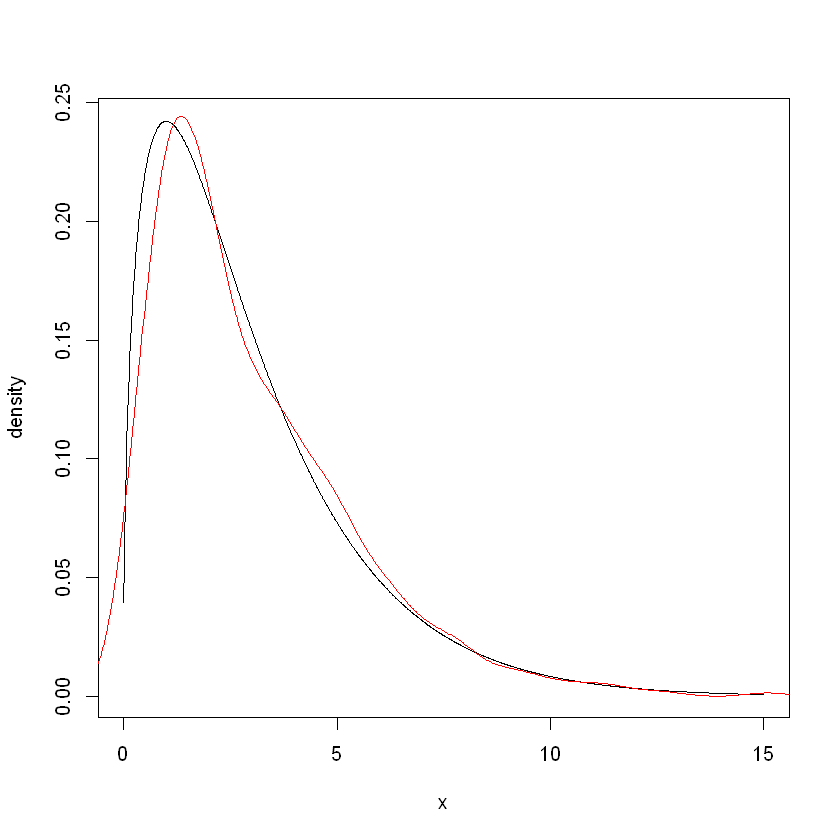

In [5]:
set.seed(888)
x_axis <- seq(0.01, 15, by = 0.01)

y <- dchisq(x_axis, df = 3)
plot(y = y, x = x_axis, type = "l", xlab = "x", ylab = "density")
z <- rchisq(1000, df = 3)
lines(density(z), col = "red")
crit <- qchisq(.95, df = 3)

mean(z > crit)


## User-defined Function

* Highly recommended to encapsulate repeated procedures into a user-defined function.

1. In the developing stage, focus on a small chunk of code. More manageable.
2. Variables defined inside a function are local.
3. In revision, only need to change one place. 

The format of a user-defined function is

```
function_name <- function(input) {
  expressions
  return(output)
}
```

**Example**

* 95% two-sided asymptotic confidence interval as
$$\left(\hat{\mu} - \frac{1.96}{\sqrt{n}} \hat{\sigma}, \hat{\mu} + \frac{1.96}{\sqrt{n}} \hat{\sigma} \right)$$
from a given sample.

* An easy job, but no built-in function.


In [ ]:
# construct confidence interval

CI <- function(x) {
  # x is a vector of random variables

  n <- length(x)
  mu <- mean(x)
  sig <- sd(x)
  upper <- mu + 1.96 / sqrt(n) * sig
  lower <- mu - 1.96 / sqrt(n) * sig
  return(list(lower = lower, upper = upper))
}


## Flow Control

* Flow control is common in all programming languages.

  * `if` is used for choice
  * `for` or `while` is used for loops.


**Example**

Calculate the empirical coverage probability of a Poisson distribution of degrees of freedom 2.
We conduct this experiment for 1000 times.


In [6]:
Rep <- 1000
sample_size <- 100
capture <- rep(0, Rep)

if (sample_size < 50){
      print("Sample size too small. Refuse to work")
      } else {
    for (i in 1:Rep) {
      mu <- 2
      x <- rpois(sample_size, mu)
      bounds <- CI(x)
      capture[i] <- ((bounds$lower <= mu) & (mu <= bounds$upper))
    }
    print("Asymptotic theory may work")
    cat("the emprical size = ", mean(capture)) # empirical size
}

ERROR: Error in CI(x): could not find function "CI"


## Statistical Model

* `y~x`
  * `y`: dependent variable,
  * `x`: explanatory variable.
* `lm(y~x, data = data_frame)`.


### A Linear Regression 

This is a toy example with simulated data.

In [ ]:
n <- 100
p <- 1

b0 <- 1
# Generate data
x <- matrix(rnorm(n * p), n, 1)
y <- x %*% b0 + rnorm(T)

# Linear Model
result <- lm(y ~ x)
summary(result)


Plot the true value of $y$ and fitted value

In [ ]:
plot(result$fitted.values,
  col = "red", type = "l", xlab = "x", ylab = "y",
  main = "Fitted Value"
)
lines(y, col = "blue", type = "l", lty = 2)
legend("bottomleft",
  legend = c("Fitted Value", "True Value"),
  col = c("red", "blue"), lty = 1:2, cex = 0.75
)



Then we plot the best fitted line.


In [ ]:
plot(y = y, x = x, xlab = "x", ylab = "y", main = "Fitted Line")
abline(a = result$coefficients[1], b = result$coefficients[2])
abline(a = 0, b = b0, col = "red")

legend("bottomright",
  legend = c("Fitted Line", "True Coef"),
  col = c("black", "red"), lty = c(1, 1), cex = 0.75
)


**Exercise**

In a [previous exercise](#AJR_exec) we have compiled a subset of observations in `AJR.csv` with all variables `shortnam`, `logpgp95`, `avexpr`, `lat_abst`, and `logem4` and none is missing.
Run an instrumental variable regression with `logpgp95` as the dependent variables, 
`avexpr` and `latabst` as explanatory variables, 
and `logem4` and `lat_abst` as instrumental variables. (Hint: use the function `AER::ivreg()`)


## Reading

<!-- [Wickham and Grolemund](https://r4ds.had.co.nz/): Ch 1, 2, 4, 8, 19 and 20 -->
* A thorough reading of [R-Introduction](https://cran.r-project.org/doc/manuals/r-release/R-intro.pdf) 
* Wickham and Grolemund](https://r4ds.had.co.nz/)
  * Ch 4: workflow: basics
  * Ch 6: workflow: scripts
  * Ch 8: workflow: projects


CUHK resource: [datacamp](http://easyaccess1.lib.cuhk.edu.hk/limited/datacamp.htm)